# **Tidying**

Part of the data engineering process is data cleaning and tidying. What is done in those two processes, is trying to make the data more readable, and complete. This makes much easier to analyze, visualize, and train the data.


## **Data Tidying**

Making the data more organized, and readable is the result of applying data tidying. 

In this section two main pandas functions are used in data tidying those are `melt` and `pivot_table`.

Let's start by taking a look at the below dataframe, which represents the income ranges based on religion. This is part of the PEW research, which is famous in the US for conducting pollings and surveys on citizens.

When the following are satisfied:


1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

We can then say that our dataset is *tidy*.

First we need to import pandas to read csv datasets.

In [194]:
# Import necessary libraries and modules
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt


### **PEW Research Dataset**

1. Start by Importing the dataset into a pandas dataframe.

2. Observe the dataset using the `loc`, `iloc`, `head`, or `tail` approaches

In [195]:
# Read the Pew csv and display using head
PEWdf = pd.read_csv("pew-raw.csv")
PEWdf.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35


In [196]:
# display using tail
PEWdf.tail()


,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
5,Evangelical Prot,575,869,1064,982,881,1486
6,Hindu,1,9,7,9,11,34
7,Historically Black Prot,228,244,236,238,197,223
8,Jehovahs Witness,20,27,24,24,21,30
9,Jewish,19,19,25,25,30,95


In [197]:
# display using loc
PEWdf.loc[:]   

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35
5,Evangelical Prot,575,869,1064,982,881,1486
6,Hindu,1,9,7,9,11,34
7,Historically Black Prot,228,244,236,238,197,223
8,Jehovahs Witness,20,27,24,24,21,30
9,Jewish,19,19,25,25,30,95


In [198]:
# display using iloc
PEWdf.iloc[:, :]

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35
5,Evangelical Prot,575,869,1064,982,881,1486
6,Hindu,1,9,7,9,11,34
7,Historically Black Prot,228,244,236,238,197,223
8,Jehovahs Witness,20,27,24,24,21,30
9,Jewish,19,19,25,25,30,95


***What does not seem right in the above dataframe?***

- The headers of each feature are labelled as income brackets (wide format) this is not ideal for analysis
- The income brackets should not be in separate columns they should be put into the long/tidy format and have all income brackets in the same column and the frequency in another column

3. Try to make the column headers represent a variable not a value. For that, use the `melt` function.

In [199]:
## tidy pew data using melt
tidy_PEWdf = pd.melt(PEWdf, 
                  id_vars=['religion'], 
                  var_name='Income', 
                  value_name='Frequency')
tidy_PEWdf.head()

,religion,Income,Frequency
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Dont know/refused,<$10k,15


### **Billboard Dataset**

This dataset outlines data about the top hit songs on the Billboard list and the week from entrance that it was in the billboard with the ranking.

1. Read the dataset and store it in a pandas dataframe. Note that the usual utf-8 encoding does not work on this dataset. The reason behind this is that there might be characters that are not supported by `utf-8`.

The suggestion is to use for this dataset `unicode_escape` encoding. (converts all non-ASCII characters into their \uXXXX representations)

In [200]:

 # read billboard csv
BBdf = pd.read_csv("billboard.csv",encoding='unicode_escape')



2. Observe the first few rows of the dataset.

In [201]:
# display using head
BBdf.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***What is wrong with the above dataset?***

3. Let's, again, use the `melt` function to fix the general structure of the dataframe.

In [202]:

# fix general structure using melt
BBdf_melted = pd.melt(
    BBdf,
    id_vars=['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered', 'date.peaked'],
    var_name='week',
    value_name='rank'
)
BBdf_melted.head()


,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0


If we inspect the current dataframe. We find that it is structured in a better way than before. 

However, the ***Week*** column looks a bit ugly!

4. Let's try to place only the week number in that column without the extras surronding it.

In [203]:
## remove garbage from the week column header
BBdf_melted['week'] = BBdf_melted['week'].str.extract(r'(\d+)').astype('Int64')



5. Now let's inspect the ***Week*** column in the dataframe.

In [204]:
## simple inspection of the week column

unique_weeks = BBdf_melted['week'].unique()
week_stats = BBdf_melted['week'].describe()
missing_values = BBdf_melted['week'].isna().sum()

print("week stats ->", week_stats)
print("unique values", unique_weeks)
print("missing values", missing_values)

week stats -> count      24092.0
mean          38.5
std      21.937866
min            1.0
25%          19.75
50%           38.5
75%          57.25
max           76.0
Name: week, dtype: Float64
unique values <IntegerArray>
[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
Length: 76, dtype: Int64
missing values 0


Next, let's try to find the date at which the song ranked the number that is shown per row.

6. To do that let's first think of the equation that is going to get us the relevant date at which the song ranked the *rth*.



In [205]:

## us time delta to add a new column that shows the chart date
BBdf_melted['billboard_date'] = pd.to_datetime(BBdf_melted['date.entered']) + pd.to_timedelta(BBdf_melted['week'] - 1, unit='W')
BBdf_melted.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank,billboard_date
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0,2000-09-23
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0,2000-02-12
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0,1999-10-23
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0,2000-08-12
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0,2000-08-05


*Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format / value into a Timedelta type.*


***What is the problem with the calculation above?***

The calculation assumes uniform weekly intervals starting from date.entered, which might not reflect the actual billboard_date. This can lead to inaccuracies in our analysis.

7. Let's only keep necessary columns

In [206]:
## remove unecesssary columns
BBdf_clean = BBdf_melted[['artist.inverted', 'track', 'week', 'rank', 'billboard_date']]

BBdf_clean.head()

,artist.inverted,track,week,rank,billboard_date
0,Destiny's Child,Independent Women Part I,1,78.0,2000-09-23
1,Santana,"Maria, Maria",1,15.0,2000-02-12
2,Savage Garden,I Knew I Loved You,1,71.0,1999-10-23
3,Madonna,Music,1,41.0,2000-08-12
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),1,57.0,2000-08-05


8. How to rename your columns?

In [207]:
# clean  the data feature names
BBdf_clean = BBdf_clean.rename(columns={
    'artist.inverted': 'artist',
    'track': 'song',
    'week': 'week_number',
    'rank': 'chart_rank',
    'billboard_date': 'date'
})

Display the dataframe

In [208]:
BBdf_clean.head(10)

,artist,song,week_number,chart_rank,date
0,Destiny's Child,Independent Women Part I,1,78.0,2000-09-23
1,Santana,"Maria, Maria",1,15.0,2000-02-12
2,Savage Garden,I Knew I Loved You,1,71.0,1999-10-23
3,Madonna,Music,1,41.0,2000-08-12
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),1,57.0,2000-08-05
5,Janet,Doesn't Really Matter,1,59.0,2000-06-17
6,Destiny's Child,Say My Name,1,83.0,1999-12-25
7,"Iglesias, Enrique",Be With You,1,63.0,2000-04-01
8,Sisqo,Incomplete,1,77.0,2000-06-24
9,Lonestar,Amazed,1,81.0,1999-06-05


In the above dataframe, there are some *NaN* values. What are we going to do? <br/>
9. Apply quick data cleaning and then observe the dataset

In [209]:

# clean the data
BBdf_clean = BBdf_clean.dropna(subset=['artist', 'song', 'week_number', 'chart_rank', 'date'])
BBdf_clean = BBdf_clean.reset_index(drop=True)
BBdf_clean.head()

,artist,song,week_number,chart_rank,date
0,Destiny's Child,Independent Women Part I,1,78.0,2000-09-23
1,Santana,"Maria, Maria",1,15.0,2000-02-12
2,Savage Garden,I Knew I Loved You,1,71.0,1999-10-23
3,Madonna,Music,1,41.0,2000-08-12
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),1,57.0,2000-08-05


## **Data Cleaning**

Data cleaning involves removing unwanted characters, imputing, or dropping missing values.

The decision is based on the dataset you have, and the information you can extract from the other columns.


Examples of data cleaning include cleaning:

1.   **Missing Data**
2.   **Irregular Data** (Outliers)
3.   **Unnecessary Data** — Repetitive Data, Duplicates and more
4.   **Inconsistent Data** — Capitalization, Addresses and more








### **Cars Data Set**

Start by reading the dataset related to car models: ./CSVs/cars.csv

First Row seems to be the datatype, we need to remove it

In [210]:
## read and display car.csv file
car_df = pd.read_csv("cars.csv", encoding="unicode_escape", sep=";", skiprows=[1])

car_df.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,NaN,8,307.0,130.0,3504.0,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,NaN,3693.0,11.5,70,US
2,Plymouth Satellite,NaN,8,318.0,150.0,3436.0,11.0,70,US
3,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US


Let's observe the columns with null values.  Either by using the `isnull().sum()` function 

In [211]:
# columns with null values
total_miss = car_df.isnull().sum()
print(total_miss)


Car             0
MPG             3
Cylinders       0
Displacement    1
Horsepower      2
Weight          1
Acceleration    0
Model           0
Origin          0
dtype: int64


There aren't many missing values. Let's take a glimpse at the percentage of the missing values:

**HINT:** We'll need `Numpy` for the below task.

In [212]:
# calculate percentage of missing values from the entire data matrix

total_cells = np.prod(car_df.shape)


missing_values = (total_miss / total_cells) * 100
missing_values = round(missing_values, 2)

print(sum(missing_values),"% of values are missing")


0.19 % of values are missing


Around *0.19%* of the values are missing, which isn't a lot. Therefore, we might go with the option of dropping all the rows with null values.

Lets also check dropping the columns

In [213]:
## drop rows
car_df_dropped_columns = car_df.dropna(axis=1)

car_df_dropped_columns.head()

,Car,Cylinders,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,8,12.0,70,US
1,Buick Skylark 320,8,11.5,70,US
2,Plymouth Satellite,8,11.0,70,US
3,AMC Rebel SST,8,12.0,70,US
4,Ford Torino,8,10.5,70,US


Let's observe how many columns we lost

In [214]:
# calculate lost columns and printing it
original_columns = car_df.shape[1]

remaining_columns = car_df_dropped_columns.shape[1]

lost_col = original_columns - remaining_columns

print("we lost", lost_col, "columns")

we lost 4 columns


### **Cars Dataset - Filling in missing values automatically**

Another option is to try and fill in the missing values through imputations.

Let's take the `MPG` column for example. We can fill in the missing values with 0s through the following line of code:

`df_cars.fillna(0) `. 

However, this does not make much sense as there isn't MPG equal to 0. How about we plot the MPG column and if it follows a random distribution we can use the mean of the column to compute the missing values. Otherwise, we can use the median (if there is a skewed normal distribution). However, there might be a better way of imputation which is getting the median or the mean of the MPG of the cars with similar attributes.

If we observe the graph above, we can consider it in a way or another normally distributed. Therefore, we can impute the missing values using the mean.

To compute the mean we need numeric values. However the values in the dataframe are objects. Therefore, we need to change them to numerics so that we can compute them.

Now let's see what is the mean of the MPG column

In [215]:

## calculate mpg mean
mpg_mean = car_df["MPG"].mean()

print(mpg_mean)

23.096277915632754


We can use this mean to compute the missing values since the graph demonstarted a normal distribution

### **Car Dataset - Simple Imputer**

*SimpleImputer* is a `scikit-learn` class which is helpful in handling the missing data in the predictive model dataset. It replaces the `NaN` values with a specified placeholder.
It is implemented by the use of the `SimpleImputer()` method which takes the following arguments :

`missing_values` : The missing_values placeholder which has to be imputed. By default is NaN

`strategy` : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.


Let's start by importing the `SimpleImputer` into our notebook

In [216]:
## imports are all at the top

What we need to do are two essential steps:

1. fit the data (compute the mean / median / most freq)
2. transform the data (place the computed values in the NaN cells)

In [217]:
## lets select the numeric columns
numeric_cols = car_df.select_dtypes(include='number').columns
## using imputer strategy  as mean
imputer = SimpleImputer(strategy='mean')


#trasnform the original data 
car_df[numeric_cols] = imputer.fit_transform(car_df[numeric_cols])

car_df.head()



,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,23.096278,8.0,307.000000,130.000000,3504.000000,12.0,70.0,US
1,Buick Skylark 320,15.000000,8.0,350.000000,103.143564,3693.000000,11.5,70.0,US
2,Plymouth Satellite,23.096278,8.0,318.000000,150.000000,3436.000000,11.0,70.0,US
3,AMC Rebel SST,16.000000,8.0,194.509877,150.000000,2978.293827,12.0,70.0,US
4,Ford Torino,17.000000,8.0,302.000000,140.000000,3449.000000,10.5,70.0,US


## **Outlier Detection** 


An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s data frame.



https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/





In [218]:
## I put all my imports at the top so loading data wont be there but for marking purposes

# from sklearn.datasets import load_diabetes

# we need that ^

diabetes = load_diabetes()
dbdf = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)


### Outliers Visualization

#### Visualizing Outliers Using Box Plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

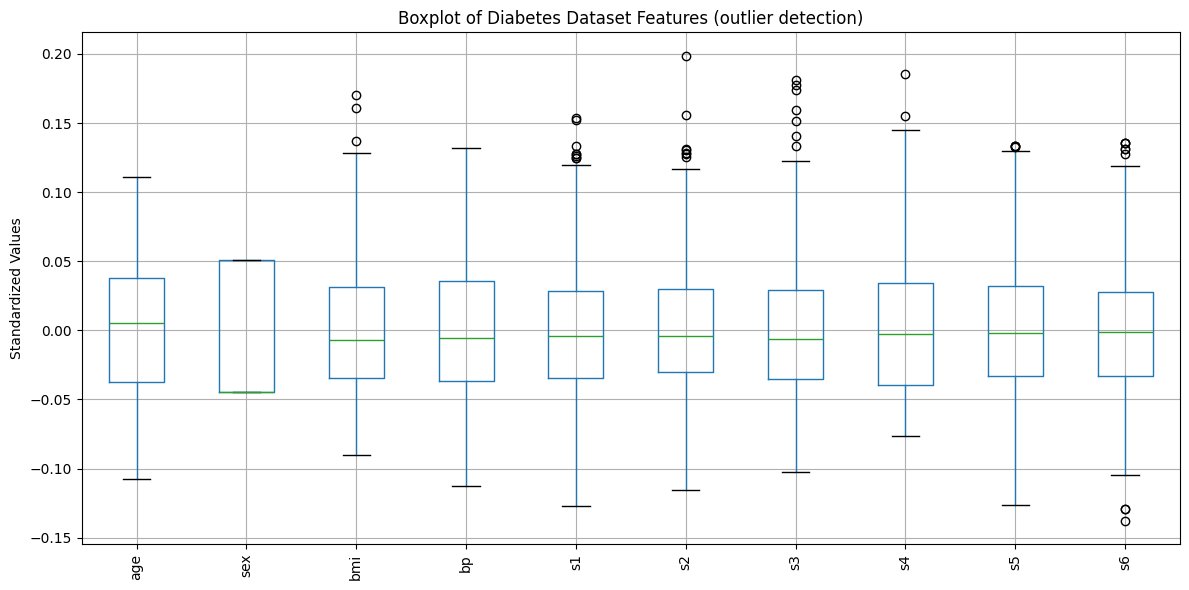

In [219]:
## Create boxplot
plt.figure(figsize=(12, 6))
dbdf.boxplot(rot=90)
plt.title("Boxplot of Diabetes Dataset Features (outlier detection)")
plt.ylabel("Standardized Values")
plt.tight_layout()
plt.show()

#### Visualizing Outliers Using ScatterPlot.

It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

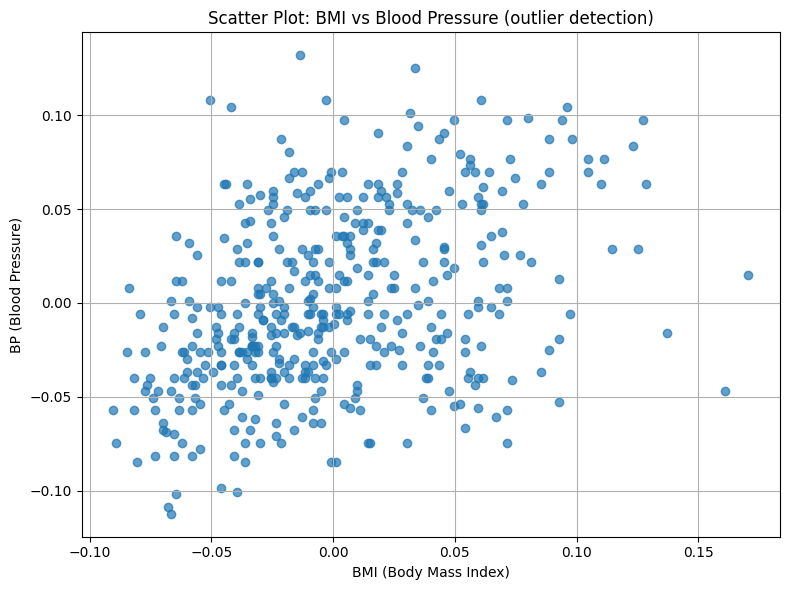

In [220]:
## create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(dbdf['bmi'], dbdf['bp'], alpha=0.7)
plt.title("Scatter Plot: BMI vs Blood Pressure (outlier detection)")
plt.xlabel("BMI (Body Mass Index)")
plt.ylabel("BP (Blood Pressure)")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Z-Score:
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.
<br>
Zscore = (data_point -mean) / std. deviation



In [221]:

# calculate the z-scores
z_scores = np.abs(zscore(dbdf))

# we will set threshold to 3 because that is the commonly used one and will serve our purposes

outliers = (z_scores > 3).any(axis=1)

outlier_rows = dbdf[outliers]
print(f"Number of outliers: {outlier_rows.shape[0]}")
outlier_rows.head()

Number of outliers: 12


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
58,0.041708,-0.044642,-0.064408,0.035644,0.012191,-0.057994,0.181179,-0.076395,-0.000612,-0.050783
123,0.005383,0.050680,0.034751,-0.001091,0.152538,0.198788,-0.061809,0.185234,0.015568,0.073480
216,0.012648,0.050680,0.035829,0.049415,0.053469,0.074155,-0.069172,0.145012,0.045604,0.048628
230,-0.038207,0.050680,0.071397,-0.057313,0.153914,0.155887,0.000779,0.071948,0.050281,0.069338
256,-0.049105,-0.044642,0.160855,-0.046985,-0.029088,-0.019790,-0.047082,0.034309,0.028020,0.011349


Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

Rows where Z value is greater than 2

In [222]:
## same process but with threshold 2
outliers_z2 = (z_scores > 2).any(axis=1)
outlier_rows_z2 = dbdf[outliers_z2]
print("first 5 rows with outlier z-score > 2")
outlier_rows_z2.head()


first 5 rows with outlier z-score > 2


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064
10,-0.096328,-0.044642,-0.083808,0.008101,-0.103389,-0.090561,-0.013948,-0.076395,-0.062917,-0.034215
11,0.027178,0.050680,0.017506,-0.033213,-0.007073,0.045972,-0.065491,0.071210,-0.096435,-0.059067
15,-0.052738,0.050680,-0.018062,0.080401,0.089244,0.107662,-0.039719,0.108111,0.036060,-0.042499


#### IQR (Inter-Quartile Range)
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field. <Br>
IQR = Quartile3 - Quartile1

In [223]:
# calculations
Q1 = dbdf.quantile(0.25)
Q3 = dbdf.quantile(0.75)
IQR = Q3 - Q1

To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :<br>
upper = Q3 + 1.5 * IQR <br>
lower = Q1 - 1.5 * IQR <br> 

In [224]:
is_outlier = ((dbdf < (Q1 - 1.5 * IQR)) | (dbdf > (Q3 + 1.5 * IQR))).any(axis=1)
## show the rows taht met these conditions
outlier_rows = dbdf[is_outlier]
print("rows that meet the outlier conditions based on IQR")
outlier_rows.head()

rows that meet the outlier conditions based on IQR


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
23,0.045341,0.050680,0.060618,0.031065,0.028702,-0.047347,-0.054446,0.071210,0.133597,0.135612
35,0.048974,0.050680,-0.030996,-0.049291,0.049341,-0.004132,0.133318,-0.053516,0.021311,0.019633
58,0.041708,-0.044642,-0.064408,0.035644,0.012191,-0.057994,0.181179,-0.076395,-0.000612,-0.050783
84,0.001751,-0.044642,-0.039618,-0.100934,-0.029088,-0.030124,0.044958,-0.050195,-0.068332,-0.129483
117,0.059871,-0.044642,-0.021295,0.087287,0.045213,0.031567,-0.047082,0.071210,0.079122,0.135612


- Removing the outliers:
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

In [ ]:
# lets remove based on both the zscore and iqr outliers
non_outliers_z = (z_scores < 3).all(axis=1)
non_outliers_iqr = ~((dbdf < (Q1 - 1.5 * IQR)) | (dbdf > (Q3 + 1.5 * IQR))).any(axis=1)

combined_outliers = non_outliers_iqr & non_outliers_z

dbdf_clean = dbdf[combined_outliers].reset_index(drop=True)

dbdf.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
